In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[[ 5.13]]


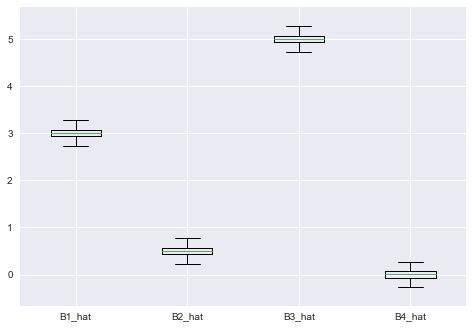

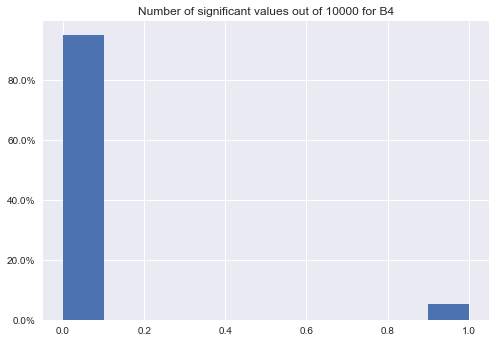

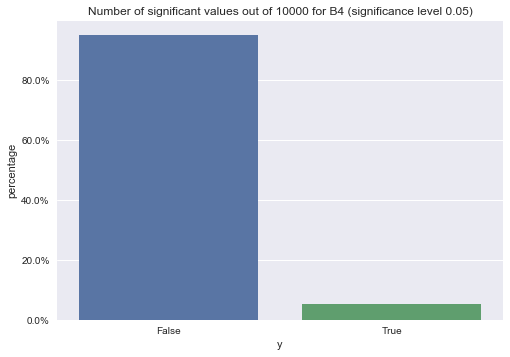

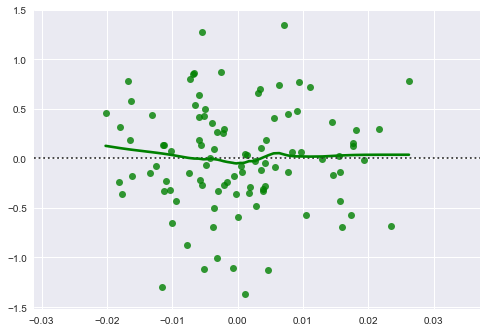

In [29]:
n = 100
mu, sigma = 0, 1
B1, B2, B3, B4 = 3, 0.5, 5, 0

rep = 10000
x1 = np.random.normal(mu,sigma,size=(n,rep))
u = np.random.normal(mu,sigma,size=(n,rep))
x2 = np.random.normal(mu, sigma, size = (n,rep))
x3 = np.random.normal(mu, sigma, size = (n,rep))


#####################################
#x0 = np.ones((n,1))
#newx = np.append(x0, x, axis=1)
#print(newx)
#X = pd.DataFrame(x)
#X = sm.add_constant(X)
####################################

y = B1 + B2*x1 + B3*x2 + B4*x3 + u


param = []
pvalues = []
resid = []
for i in range(0,rep):
    X1 = pd.DataFrame(x1[:,i], columns = ['x1'])
    X1.loc[:,'x2'] = x2[:,i]
    X1.loc[:,'x3'] = x3[:,i]
    X1 = sm.add_constant(X1)
    #y = B1*X1['const'] + B2*X1[0] + u
    res = sm.OLS(y[:,i],X1).fit()
    #print(res.summary())
    #param = np.array(res.params)
    param.append(np.array(res.params))
    pvalues.append(np.array(res.pvalues))
    resid.append(np.array(res.resid))
    

regression_coefs = np.asmatrix(param)
Average_coefs = regression_coefs.mean(0)
#print(Average_coefs)
pvalues1 = np.asmatrix(pvalues)
print((sum(pvalues1[:,3] < 0.05)/10000)*100)
#print(pvalues1[:,3]<0.05)

Labels = ['B1_hat', 'B2_hat', 'B3_hat', 'B4_hat']
plt.boxplot(regression_coefs, labels = Labels)
plt.show()


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y/rep)

    # The percent symbol needs escaping in latex
    if plt.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'



plt.hist(pvalues1[:,3]<0.05)
plt.title('Number of significant values out of 10000 for B4')
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()


y = pd.DataFrame(pvalues1[:,3]<0.05, columns=['y'])

sns.countplot(x = 'y', data =y)
plt.title('Number of significant values out of 10000 for B4 (significance level 0.05)')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylabel('percentage')
plt.show()
#plt.scatter(x,y)
#plt.plot(x,res.predict())
#plt.show()

# Residual plot
residuals = np.asmatrix(resid) 
Average_residuals = np.squeeze(np.asarray(residuals.mean(0)))

sns.residplot(Average_residuals, Average_y, lowess=True, color="g")
plt.show()


# Regression analysis with dummy and one continuous variable as a predictor

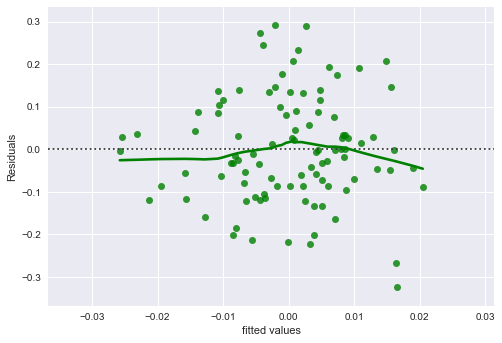

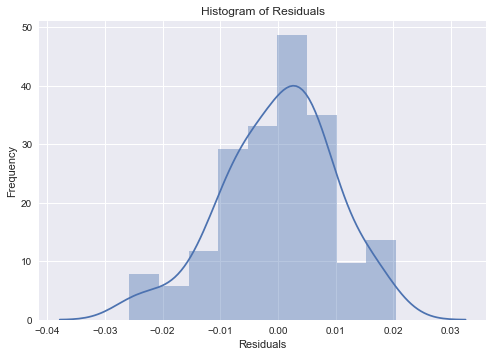

In [4]:
n = 100
mu, sigma = 0, 1
B1, B2, B3 = 3, 0.5, 1.5

rep = 10000
x1 = np.random.normal(mu,sigma,size=(n,rep))
u = np.random.normal(mu,sigma,size=(n,rep))
x2 = np.random.randint(2, size = (n,rep))


y = B1 + B2*x1 + B3*x2 + u


resid = []
fit = []
for i in range(0,rep):
    X1 = pd.DataFrame(x1[:,i], columns = ['x1'])
    X1.loc[:,'x2'] = x2[:,i]
    X1 = sm.add_constant(X1)
    res = sm.OLS(y[:,i],X1).fit()
    resid.append(np.array(res.resid))
    fit.append(np.array(res.fittedvalues))

    
fitted_values = np.asmatrix(fit)    
Average_fit =   np.squeeze(np.asarray(fitted_values.mean(0)))
    
residuals = np.asmatrix(resid) 
Average_residuals = np.squeeze(np.asarray(residuals.mean(0)))


# Residual plot
sns.residplot(Average_residuals, Average_y, lowess=True, color="g")
plt.ylabel('Residuals')
plt.xlabel('fitted values')
plt.show()


# Residual Histogram
sns.distplot(Average_residuals)
plt.title('Histogram of Residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
sns.plt.show()

# Only one dummay variable as a predictor

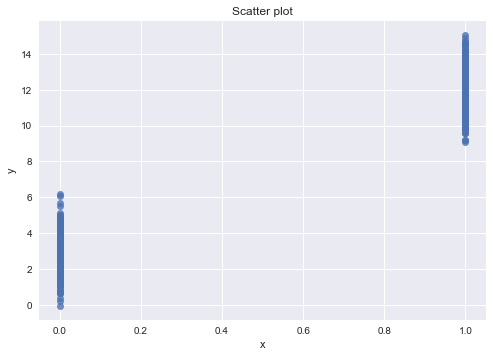

In [8]:
n = 1000
mu, sigma = 0, 1
B1, B2 = 3, 9

x1 = np.random.randint(2, size = n)
u = np.random.normal(mu,sigma,size=n)


y = B1 + B2*x1 + u



sns.regplot(x1, y, fit_reg=False)
plt.title('Scatter plot')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


In [ ]:
n = 100
mu, sigma = 0, 1
B1, B2 = 3, 0.5

rep = 100
x1 = np.random.randint(2, size = (n,rep))
u = np.random.normal(mu,sigma,size=(n,rep))


y = B1 + B2*x1 + u
Average_y = y.mean(1)


resid = []
fit = []
for i in range(0,rep):
    X1 = pd.DataFrame(x1[:,i], columns = ['x1'])
    X1 = sm.add_constant(X1)
    res = sm.OLS(y[:,i],X1).fit()
    resid.append(np.array(res.resid))
    fit.append(np.array(res.fittedvalues))
    
    
    
fitted_values = np.asmatrix(fit)    
Average_fit =   np.squeeze(np.asarray(fitted_values.mean(0))) 
residuals = np.asmatrix(resid) 
Average_residuals = np.squeeze(np.asarray(residuals.mean(0)))


sns.regplot(x1.mean(1), Average_y, fit_reg=False)
plt.title('Scatter plot')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

# Residual plot
sns.residplot(Average_fit, Average_residuals, lowess=True, color="g")
plt.ylabel('Residuals')
plt.xlabel('fitted values')
plt.show()


# Residual Histogram
sns.distplot(Average_residuals)
plt.title('Histogram of Residuals')
plt.ylabel('Frequency')
plt.xlabel('Residuals')
sns.plt.show()